<a href="https://colab.research.google.com/github/VakhromeevaKate/sechenov-ai-methods-course/blob/main/MatplotlibAndSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки для визуализации данных - Matplotlib и Seaborn

### Matplotlib
Это низкоуровневая библиотека для создания статических, анимированных и интерактивных визуализаций в Python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Создаем демо-данные
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]

### 1. Линейный график (Line Plot)

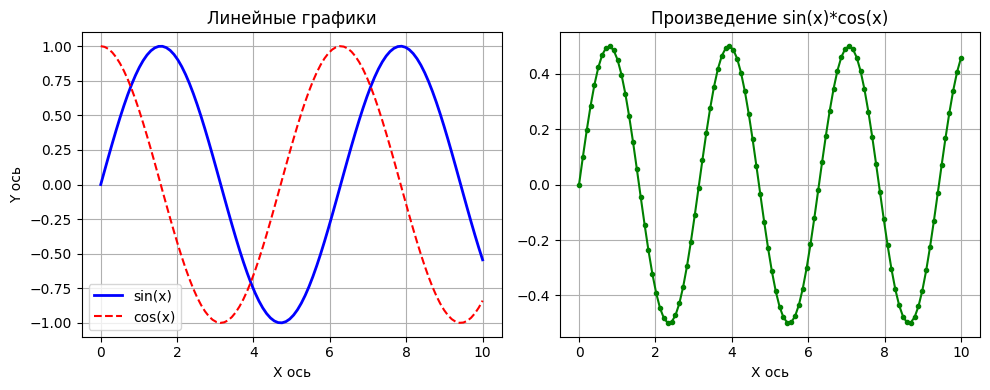

In [2]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='sin(x)', color='blue', linewidth=2)
plt.plot(x, y2, label='cos(x)', color='red', linestyle='--')
plt.title('Линейные графики')
plt.xlabel('X ось')
plt.ylabel('Y ось')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y1 * y2, color='green', marker='o', markersize=3)
plt.title('Произведение sin(x)*cos(x)')
plt.xlabel('X ось')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2. Столбчатая диаграмма (Bar Chart)

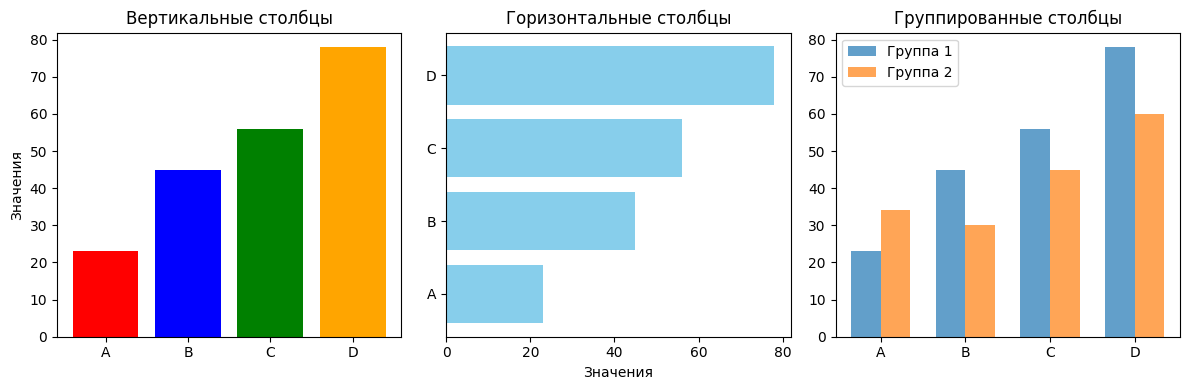

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(categories, values, color=['red', 'blue', 'green', 'orange'])
plt.title('Вертикальные столбцы')
plt.ylabel('Значения')

plt.subplot(1, 3, 2)
plt.barh(categories, values, color='skyblue')
plt.title('Горизонтальные столбцы')
plt.xlabel('Значения')

# Группированная столбчатая диаграмма
plt.subplot(1, 3, 3)
x_pos = np.arange(len(categories))
width = 0.35
values1 = [23, 45, 56, 78]
values2 = [34, 30, 45, 60]

plt.bar(x_pos - width/2, values1, width, label='Группа 1', alpha=0.7)
plt.bar(x_pos + width/2, values2, width, label='Группа 2', alpha=0.7)
plt.xticks(x_pos, categories)
plt.title('Группированные столбцы')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Круговая диаграмма (Pie Chart)

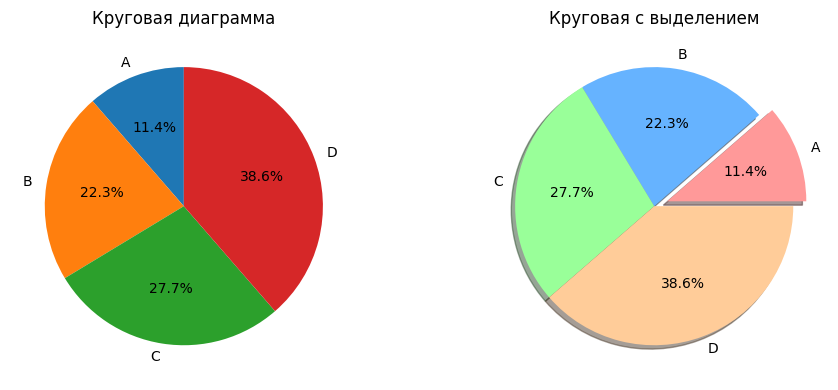

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Круговая диаграмма')

plt.subplot(1, 2, 2)
explode = (0.1, 0, 0, 0)  # Выделяем первый сектор
plt.pie(values, labels=categories, explode=explode, autopct='%1.1f%%',
        shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Круговая с выделением')

plt.tight_layout()
plt.show()

### 4. Гистограмма (Histogram)

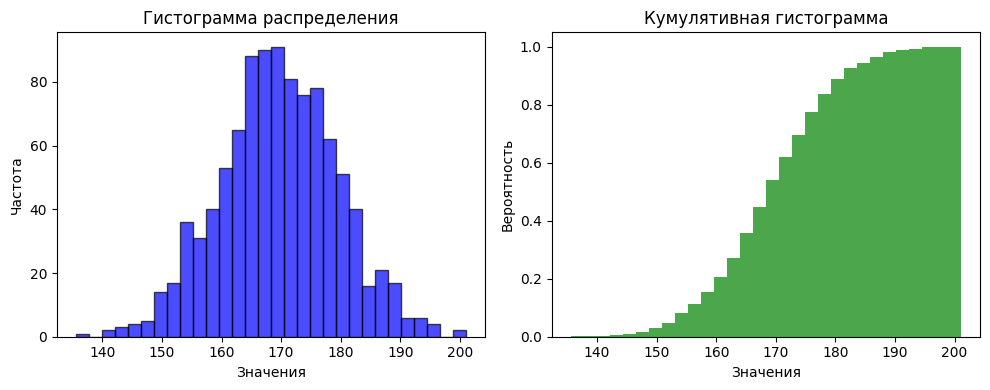

In [5]:
# Генерируем случайные данные
data = np.random.normal(170, 10, 1000)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(data, bins=30, density=True, alpha=0.7, color='green', cumulative=True)
plt.title('Кумулятивная гистограмма')
plt.xlabel('Значения')
plt.ylabel('Вероятность')

plt.tight_layout()
plt.show()

### 5. Диаграмма рассеяния (Scatter Plot)

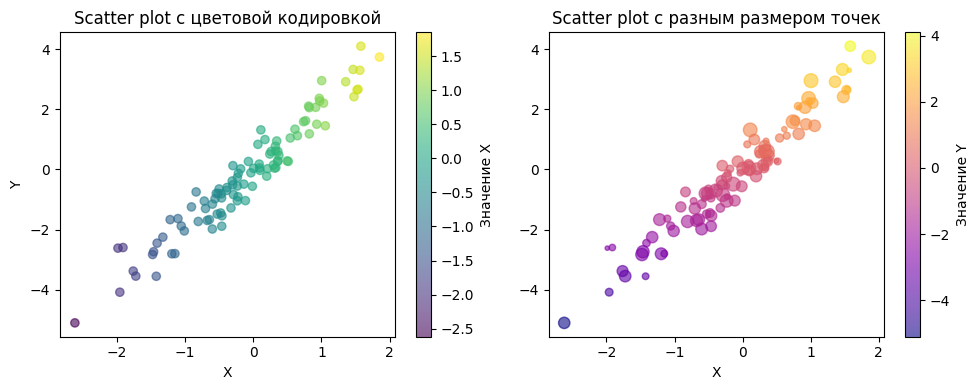

In [6]:
# Создаем данные для scatter plot
np.random.seed(42)
x_scatter = np.random.randn(100)
y_scatter = 2 * x_scatter + np.random.randn(100) * 0.5

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(x_scatter, y_scatter, alpha=0.6, c=x_scatter, cmap='viridis')
plt.colorbar(label='Значение X')
plt.title('Scatter plot с цветовой кодировкой')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
sizes = np.random.randint(10, 100, 100)
plt.scatter(x_scatter, y_scatter, s=sizes, alpha=0.6, c=y_scatter, cmap='plasma')
plt.colorbar(label='Значение Y')
plt.title('Scatter plot с разным размером точек')
plt.xlabel('X')

plt.tight_layout()
plt.show()

## Seaborn

Это высокоуровневая библиотека для создания статистических графиков, построенная на основе Matplotlib.

In [7]:
import seaborn as sns
import pandas as pd

# Загружаем встроенные датасеты
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

### 1. Distribution Plots (Распределения)

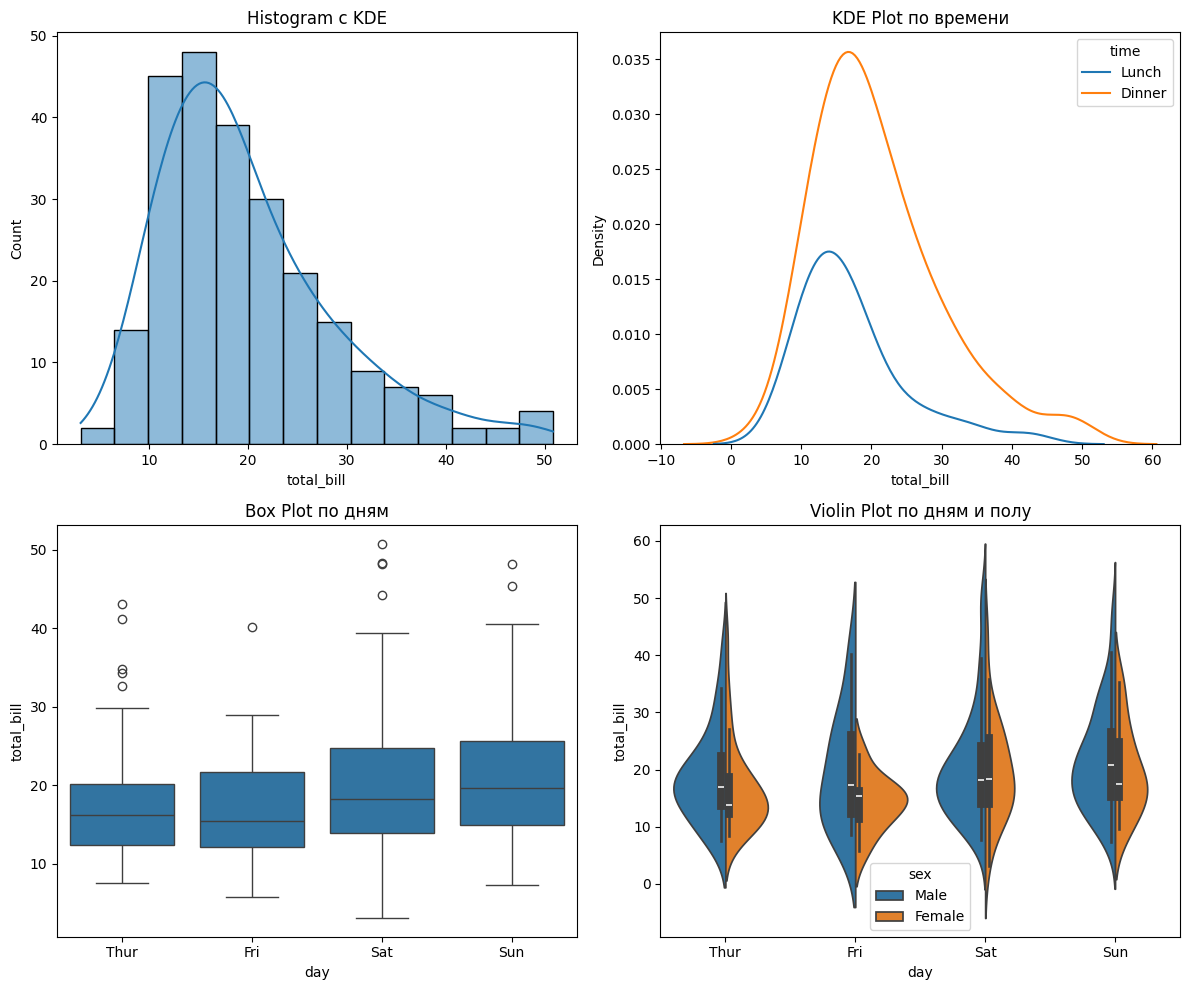

In [8]:
# Создаем фигуру
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution plot
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0,0])
axes[0,0].set_title('Histogram с KDE')

# KDE plot
sns.kdeplot(data=tips, x='total_bill', hue='time', ax=axes[0,1])
axes[0,1].set_title('KDE Plot по времени')

# Box plot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1,0])
axes[1,0].set_title('Box Plot по дням')

# Violin plot
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, ax=axes[1,1])
axes[1,1].set_title('Violin Plot по дням и полу')

plt.tight_layout()
plt.show()

### 2. Categorical Plots (Категориальные данные)

/tmp/ipython-input-3638313008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', ci=None, ax=axes[0,0])


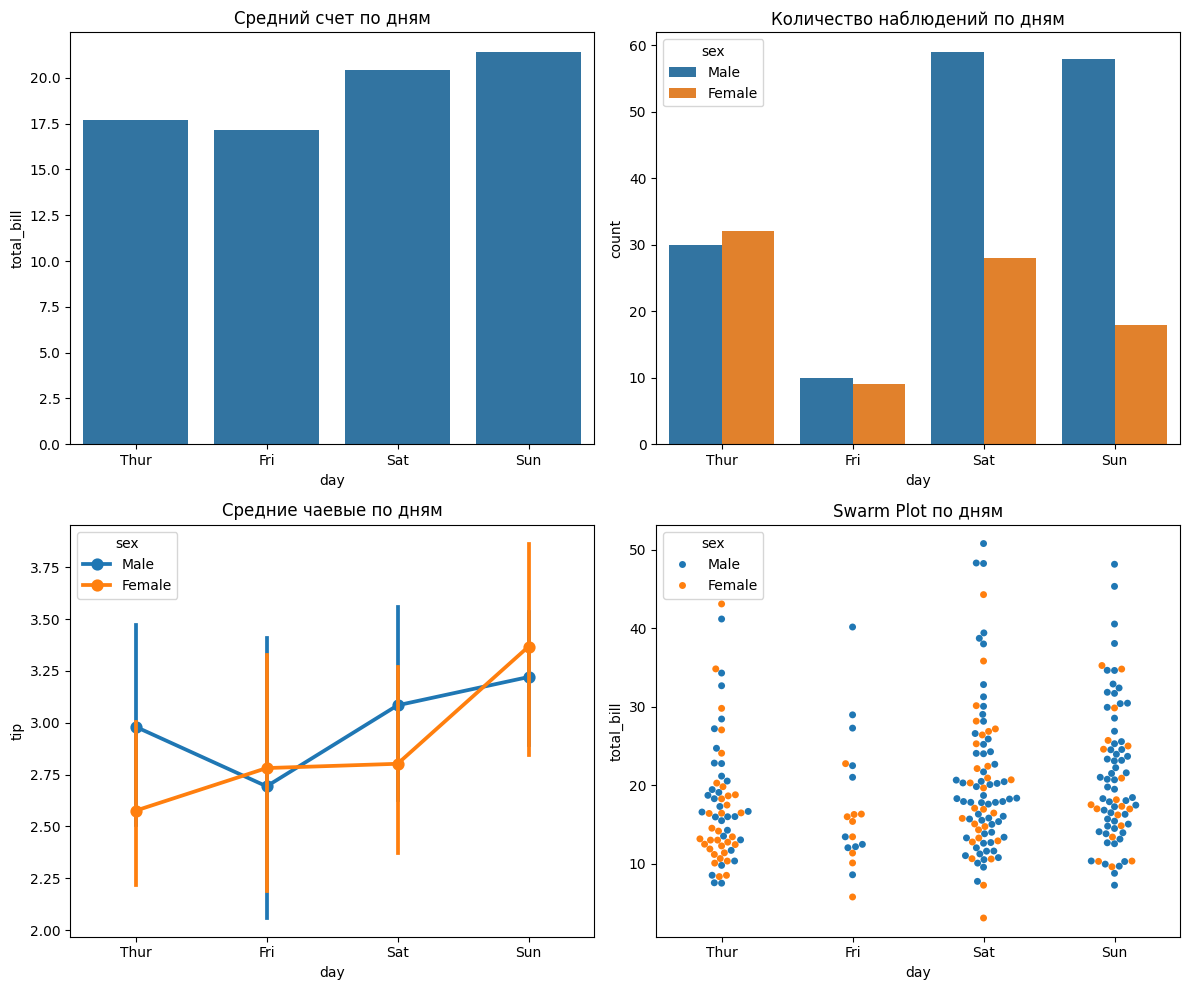

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot
sns.barplot(data=tips, x='day', y='total_bill', ci=None, ax=axes[0,0])
axes[0,0].set_title('Средний счет по дням')

# Count plot
sns.countplot(data=tips, x='day', hue='sex', ax=axes[0,1])
axes[0,1].set_title('Количество наблюдений по дням')

# Point plot
sns.pointplot(data=tips, x='day', y='tip', hue='sex', ax=axes[1,0])
axes[1,0].set_title('Средние чаевые по дням')

# Swarm plot
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[1,1])
axes[1,1].set_title('Swarm Plot по дням')

plt.tight_layout()
plt.show()

### 3. Relational Plots (Взаимосвязи)

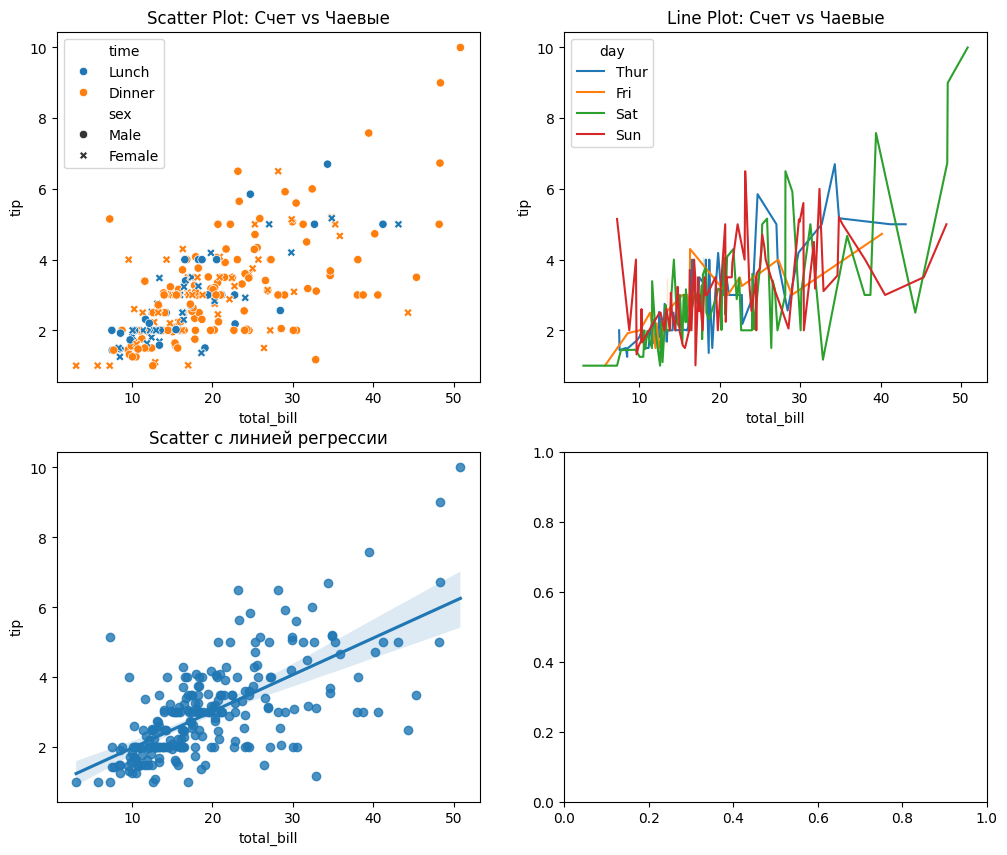

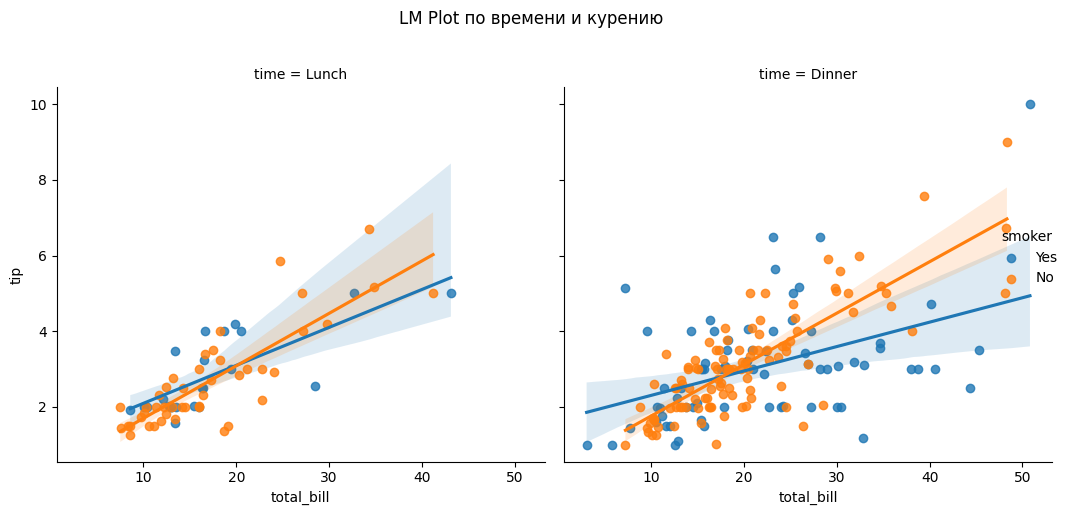

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex', ax=axes[0,0])
axes[0,0].set_title('Scatter Plot: Счет vs Чаевые')

# Line plot
sns.lineplot(data=tips, x='total_bill', y='tip', hue='day', ax=axes[0,1])
axes[0,1].set_title('Line Plot: Счет vs Чаевые')

# Relational plot с регрессией
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1,0])
axes[1,0].set_title('Scatter с линией регрессии')

# LM plot
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time')
plt.suptitle('LM Plot по времени и курению', y=1.02)

plt.tight_layout()
plt.show()

### 4. Matrix Plots (Матричные графики)

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Вычисляем корреляционную матрицу для числовых колонок
numeric_tips = tips.select_dtypes(include=[np.number])
corr_matrix = numeric_tips.corr()

plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap корреляций')

# Clustermap
plt.subplot(2, 2, 2)
iris_corr = iris.select_dtypes(include=[np.number]).corr()
sns.heatmap(iris_corr, annot=True, cmap='viridis')
plt.title('Heatmap Iris dataset')

# Pairplot (отдельно, т.к. создает свою фигуру)
plt.subplot(2, 2, 3)
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter из Pairplot')

plt.subplot(2, 2, 4)
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot Iris dataset', y=1.02)

plt.tight_layout()
plt.show()

### 5. Multi-plot Grids (Сетки графиков)

In [ ]:
# FacetGrid
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.suptitle('FacetGrid: Разные срезы данных', y=1.02)
plt.show()

# PairGrid
iris_pair = sns.PairGrid(iris, hue='species')
iris_pair.map_diag(sns.histplot)
iris_pair.map_offdiag(sns.scatterplot)
iris_pair.add_legend()
plt.suptitle('PairGrid: Диагональные и off-диагональные графики', y=1.02)
plt.show()

## Сравнение и практическое применение
Сравнение Matplotlib vs Seaborn:

Характеристика	        | Matplotlib      | 	Seaborn

Уровень абстракции      |	Низкий          |	Высокий

Стиль по умолчанию      |	Базовый         |	Красивый статистический

Сложность кода          | Больше кода     |	Меньше кода

Кастомизация            |	Полная контроль |	Ограниченная

Статистические графики  |	Ограниченные    |	Богатые возможности

Работа с DataFrame      |	Ручная          |	Автоматическая


In [ ]:
def comprehensive_eda_visualization(df):
    """
    Комплексная визуализация для EDA
    """
    fig = plt.figure(figsize=(16, 12))

    # 1. Распределение числовых переменных
    plt.subplot(2, 3, 1)
    sns.histplot(df['total_bill'], kde=True, color='skyblue')
    plt.title('Распределение общего счета')

    # 2. Boxplot по категориям
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x='day', y='total_bill', hue='sex')
    plt.title('Распределение счета по дням и полу')

    # 3. Scatter plot с регрессией
    plt.subplot(2, 3, 3)
    sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'alpha':0.5})
    plt.title('Зависимость чаевых от счета')

    # 4. Count plot
    plt.subplot(2, 3, 4)
    sns.countplot(data=df, x='day', hue='smoker')
    plt.title('Количество наблюдений по дням')

    # 5. Violin plot
    plt.subplot(2, 3, 5)
    sns.violinplot(data=df, x='time', y='total_bill', hue='sex', split=True)
    plt.title('Violin plot по времени и полу')

    # 6. Heatmap корреляций
    plt.subplot(2, 3, 6)
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Корреляционная матрица')

    plt.tight_layout()
    plt.show()

# Запускаем комплексную визуализацию
comprehensive_eda_visualization(tips)